## Introduction 

In this notebook we examine the chances of having a cardiovascular disease given certain medical features. The data used for this analysis is obtained from [Kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/) and includes typical features obtained in a medical examination such as blood pressure, cholesterol, and glucose levels. Below we list all of the features and they measurements used or what the value represents.

* Age (in days)
* Gender (1 = women, 2 = men)
* Height (in cm)
* Weight (in kg)
* Systolic Blood Pressure, ap_hi 
* Diastolic Blood Pressure, ap_lo
* Cholesterol (1 = normal, 2 = above normal, 3 = well above normal)
* Glucose (1 = normal, 2 = above normal, 3 = well above normal)
* Smoking (1 = True, 0 = False)
* Alcohol Consumption (1 = True, 0 = False)
* Physical Activity (1 = True, 0 = False)
* Cardiovascular Disease (1 = True, 0 = False)

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Cardiovascular EDA

First, let us load our data set and perform some cleaning before we do any analysis with it. 

In [75]:
df = pd.read_csv("cardio_train.csv", delimiter=';') # load our data

## Data Processing 

Below we convert the age from days to years.

In [76]:
df['age'] = (df['age'] / 365).astype(int) # converting age from days to years

## Exploratory Data Analysis 

We will look at a summary of the data set by computing various statistical variables to have a glimpse at the data we are working with.

In [77]:
df.head() # peak of our data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [78]:
df.info() # data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [79]:
df.isna().sum() # checking to see if our data has missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [80]:
df.describe() # stats

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# Correlation analysis
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


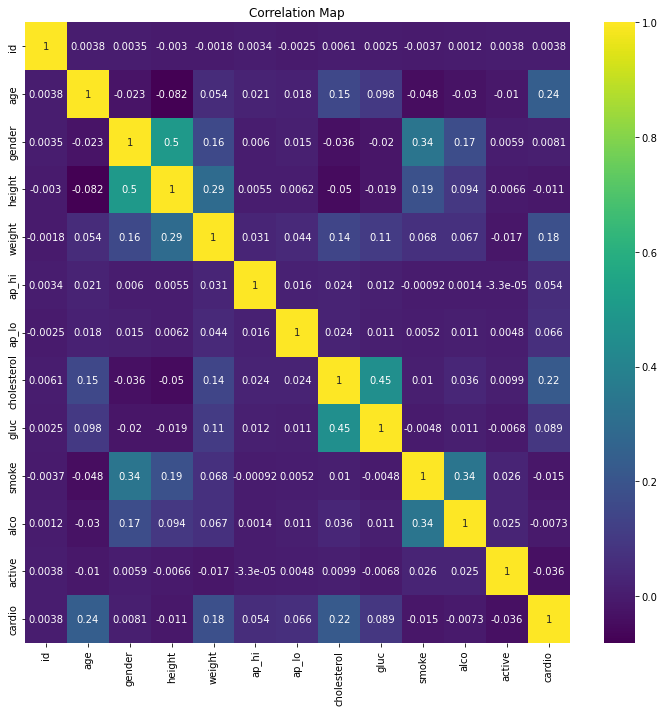

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title("Correlation Map")
plt.tight_layout()

## Rate of Cardiovascular Disease by Age

Here we look at the average rate of cardiovascular disease by age based on the data. We do this by first pulling out the information we need and converting it into a Pandas dataframe. To get the rate of people with a cardiovascular disease by age, we will calculate the average cardiovascular number for each age since for each indivudual they are assigned either a 0 or 1 for not having a cardiovascular disease versus having one, respectively. We also need a list of the ages from our data sorted out from youngest to oldest. Using a bar graph to represent our data, we have the following: 

In [83]:
# Cardiovascular disease average based on age
cvd_by_age = pd.DataFrame({
    'Average Cardiovascular Disease': df.groupby(['age'])['cardio'].mean(),
    'Age': sorted(df['age'].unique())
})

In [84]:
# Bar graph representation
px.bar(cvd_by_age, x='Age', y='Average Cardiovascular Disease', 
       title='Cardiovascular disease risk on average by age', color='Age') 

## Risk of Cardiovascular Disease by Cholesterol Level

Next, we look at the relationship between having or not having a cardiovascular disease and the cholesterol levels. This is calculated the same as the graph above except we compare it with cholesterol levels. 

In [85]:
# Cardiovascular disease average based on cholesterol levels 
cvd_by_chol = pd.DataFrame({
    'Average Cardiovascular Disease': df.groupby(['cholesterol'])['cardio'].mean(),
    'Cholesterol Levels': ['Normal', 'Above Normal', 'Well Above Normal']
})

Note that cholesterol levels is split by normal, above normal and well above normal.

In [86]:
# Data representation
px.bar(cvd_by_chol, x='Cholesterol Levels', y='Average Cardiovascular Disease',
      title="Cardiovascular disease risk on average by cholesterol", color='Cholesterol Levels')

## Cardiovascular Age Range

Below we show a distribution of the cardiovascular disease by age using a box plot. This will allow us to see if there are any outliers for each group. We also show the statistics of the graph through numerical representation.

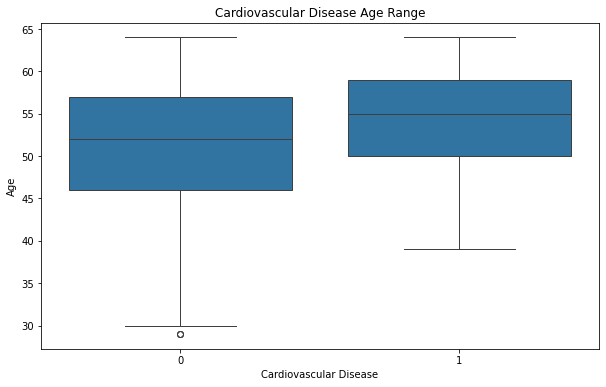

          count       mean       std   min   25%   50%   75%   max
cardio                                                            
0       35021.0  51.231261  6.783206  29.0  46.0  52.0  57.0  64.0
1       34979.0  54.452014  6.354347  39.0  50.0  55.0  59.0  64.0


In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cardio', y='age')
plt.title("Cardiovascular Disease Age Range")
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Age')
plt.show()

print(df.groupby(['cardio'])['age'].describe())

Below we present another plot that shows the cases of cardiovascular disease per age. However in this plot, we can see at what age do the amount of people with a cardiovascular disease surpass the amount of people without it. This gives us a much clearer picture that, starting from the age of 55 and on we see more people with a cardiovascular disease that without. 

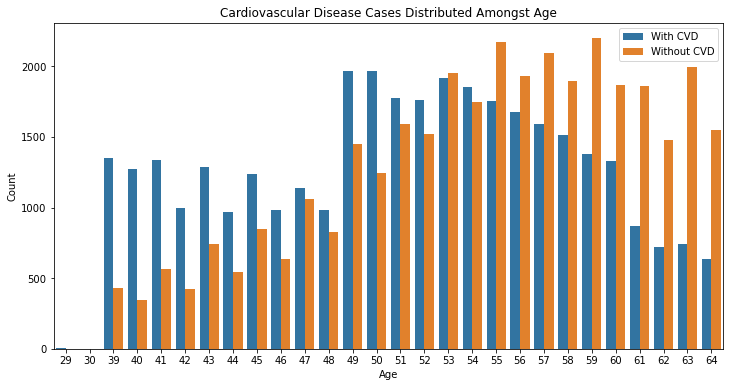

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(x='age', hue='cardio', data=df)
plt.title("Cardiovascular Disease Cases Distributed Amongst Age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['With CVD', 'Without CVD'])

We see that starting at the age of 55 years old, there are more people with a cardiovascular disease than without. This is very important in terms of promoting the risks to individuals as well as for professional medical purposes. 

## Risk of Cardiovascular Disease by Gender

Our next representation is the risk of cardiovascular disease by gender. We wanted to see which gender is more prone to having a cardiovascular disease based on our data. 

In [89]:
# Organising data into data frame split by gender 
cvd_gender = pd.DataFrame({
    'Count': df.groupby(['gender'])['cardio'].count(),
    'Gender': ['Women', 'Men']
})

# representing as a pie chart 
fig = px.pie(cvd_gender, 
             values='Count', 
             names='Gender',
             title='Cardiovascular Distribution Amongst Gender', 
             color = 'Gender', 
             color_discrete_map={'Women': 'red',
                                 'Men': 'blue'
                                })

fig.add_annotation(x=0.5, y=-.1, text="Females are significantly more at risk for cardiovascular disease then men are", showarrow=False)
fig.show()

## Population Characteristics

After looking at some exploratory analysis, here we look at the characteristics of the people in the data population. That is we look at the distribution of age, height and weight of the population in our data. 

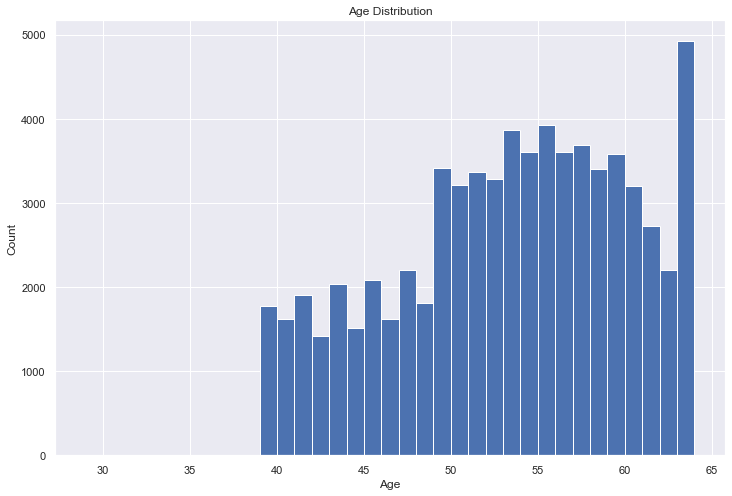

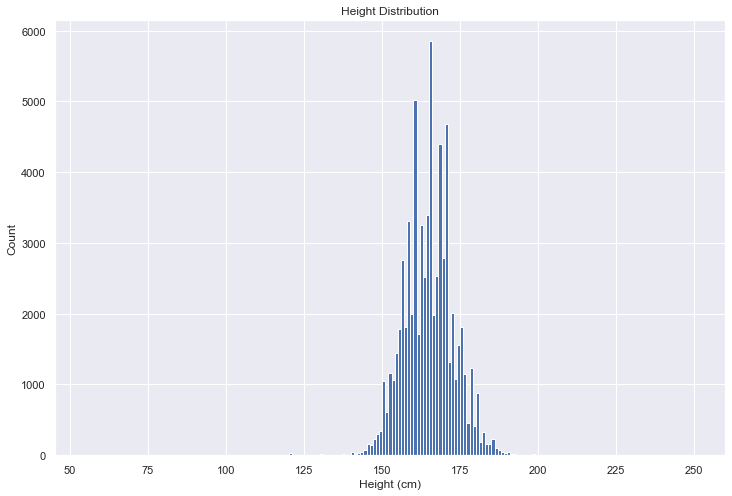

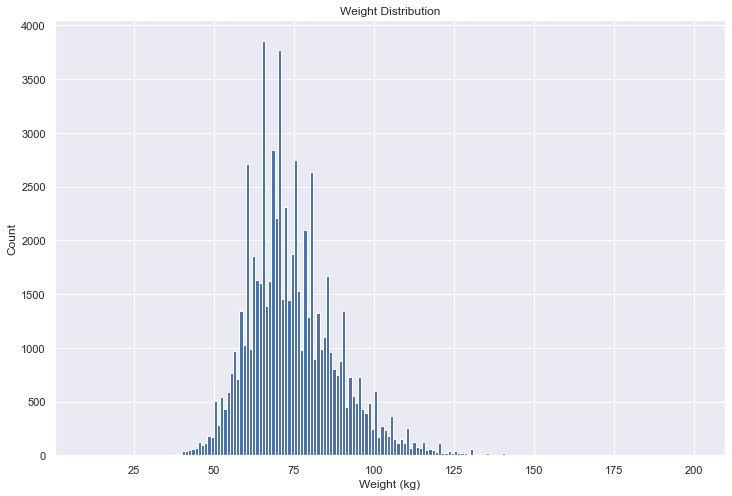

In [96]:
features = ['age', 'height', 'weight']

for feature in features:
    
    counts, bins = np.histogram(df[feature], bins=int((df[feature].max() - df[feature].min())))
    plt.figure(figsize=(12,8))
    sns.set_theme()
    plt.hist(df[feature], bins=bins)
    feature = feature.capitalize()
    if feature=='Height':
        plt.xlabel("Height (cm)")
    elif feature=='Weight':
        plt.xlabel("Weight (kg)")
    else:
        plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} ' + 'Distribution')

Above we see that we have a good amount of head count at the age of 64, followed by the mid 50s and the least number of people in their mid 40s. A majority of peoples height lies around the 160cm mark and lastly, most people are in the 65-75 kg range in weight. 

## Body Mass Index 

Let's dive deeper into the data and look at the body mass index (BMI) of individuals. BMI is calculated through the following formula,

$$
\text{Body Mass Index} = \frac{\text{Weight (kg)}}{(\text{Height (m))}^2}
$$

We will look at weather or not the BMI of a person will have any correlation with whether or not they possess a cardiovascular disease. 

In [91]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [92]:
def bmi(w: float, h: int) -> float:
    # Remember weight must be in kg and height in meters
    body_mass_index = round(w/(h**2), 1)
    return body_mass_index

In [93]:
df['bmi'] = bmi(df['weight'], df['height']/100) # Convert height from cm to m

## BMI Distribution of Individuals with Cardiovascular Disease 

Let's compare the BMI distribution of individuals with and without cardiovascular disease. Below we show our data using a box plot, however since the distribution of our data is skewed towards people with a relatively lower BMI index, we present the data using a log scale for the y-axis for better visualization. 

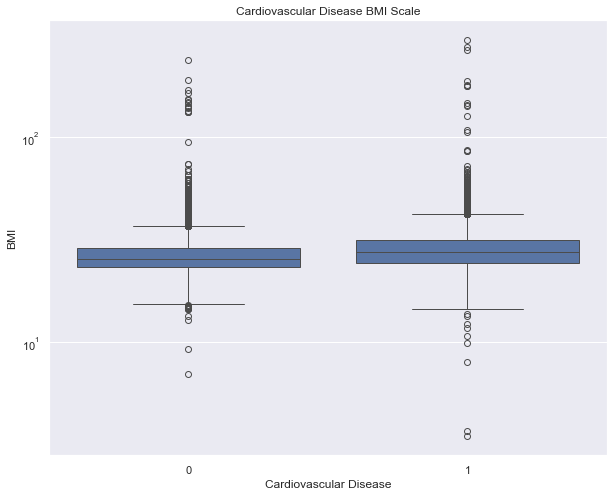

          count       mean       std  min   25%   50%   75%    max
cardio                                                            
0       35021.0  26.546752  5.607332  7.0  23.4  25.5  28.8  237.8
1       34979.0  28.565082  6.384909  3.5  24.5  27.5  31.6  298.7


In [103]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='cardio', y='bmi')
plt.title("Cardiovascular Disease BMI Scale")
plt.xlabel('Cardiovascular Disease')
plt.ylabel('BMI')
plt.yscale('log')
plt.show()

print(df.groupby(['cardio'])['bmi'].describe())

From the plot above, we see that there is a significant number of outliers, mostly for people with BMI higher than the third quartile range and some who have lower BMI than the first quartile.